## Rotating edge experiment

In [86]:
from lineart.transforms import rotate, rotate_xy, sample_line
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
import lineart.style as style

In [118]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [119]:
rotate_xy(edges, 0, np.pi/2)

array([[[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]]])

In [120]:
edges.shape


(3, 2, 3)

## split edges

In [147]:
def draw_edges(edges, image_size=100, v=False):
    
    edges = edges.reshape(-1,2,3)[:,:,:-1]
    # page setup
    d = document(image_size, image_size, 'mm')
    page = d.addpage()
    page.place(style.background.rectangle(0,0,image_size,image_size))
    for e in edges:
        print(e, e.flatten())
        page.place(style.edge.line(*e.flatten()))
    if v:
        for p in edges.reshape(-1,2):
            page.place(style.debug.circle(*p, 2))
        
    return (page.image(kind='rgba', ppi=60).png())

[[92.07795539 70.68318799]
 [45.35707949 68.72255982]] [92.07795539 70.68318799 45.35707949 68.72255982]
[[35.31122211 90.76900224]
 [13.14398364 33.82085619]] [35.31122211 90.76900224 13.14398364 33.82085619]
[[10.0064712  65.18431732]
 [49.92052781 22.94247   ]] [10.0064712  65.18431732 49.92052781 22.94247   ]
[[15.61113883 66.81869483]
 [74.06737331 25.132036  ]] [15.61113883 66.81869483 74.06737331 25.132036  ]
[[18.64449934 18.4397269 ]
 [59.63933414 90.07758356]] [18.64449934 18.4397269  59.63933414 90.07758356]
[[16.47711558 85.01164775]
 [22.49406377 11.49465225]] [16.47711558 85.01164775 22.49406377 11.49465225]


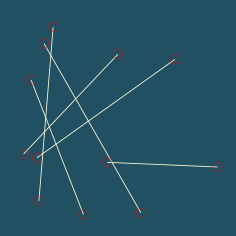

In [148]:
edges = np.random.rand(6,2,3)*100
Image(draw_edges(edges, v=True))

[[  0   0]
 [100 100]] [  0   0 100 100]


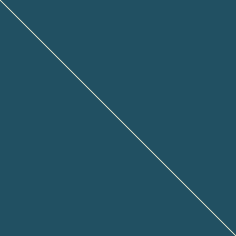

In [127]:
Image(draw_edges(e*100))

In [153]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort()
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[0].reshape(1,3),splits,e[1].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

[[ 0.          0.        ]
 [36.74156359 36.74156359]] [ 0.          0.         36.74156359 36.74156359]
[[36.74156359 36.74156359]
 [42.57080244 42.57080244]] [36.74156359 36.74156359 42.57080244 42.57080244]
[[ 42.57080244  42.57080244]
 [100.         100.        ]] [ 42.57080244  42.57080244 100.         100.        ]


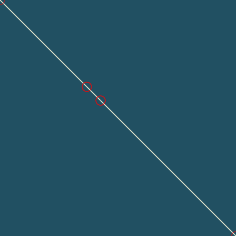

In [154]:
Image(draw_edges(split(e*100,2), v=True))

In [132]:
fracs = np.random.rand(2, 1)
fracs.sort()
vector = e[1] - e[0]
splits = np.multiply(fracs[::-1], vector) + e[0]
points = np.concatenate((e[0].reshape(1,3),splits,e[1].reshape(1,3)))
starts = points[:-1]
ends = points[1:]
edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)

In [133]:
edges

array([[[0.        , 0.        , 0.        ],
        [0.57437223, 0.57437223, 0.        ]],

       [[0.57437223, 0.57437223, 0.        ],
        [0.29296656, 0.29296656, 0.        ]],

       [[0.29296656, 0.29296656, 0.        ],
        [1.        , 1.        , 0.        ]]])

In [103]:
starts

array([[0.        , 0.        , 0.        ],
       [0.        , 0.77856468, 0.        ],
       [0.        , 0.88366932, 0.        ]])

In [94]:
e[0].shape

(3,)

In [104]:
edges.shape

(6, 2, 3)